## Welcome to your notebook.


#### Scheduling Notebook (require specific privileges)
1. Go to Tasks and click create task
2. Provide a task title and optionally set up parameters
3. specify the details of the task schedule—when it starts, how often it repeats, when it ends, etc

Resources:
https://www.esri.com/arcgis-blog/products/arcgis-online/announcements/scheduled-mode-for-arcgis-notebooks-in-arcgis-online-is-here/
https://www.esri.com/arcgis-blog/products/arcgis-online/analytics/use-parameters-in-your-scheduled-notebooks/

#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

#### Now you are ready to start!

In [2]:
pip install geopandas

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
DEPRECATION: Loading egg at /opt/conda/lib/python3.11/site-packages/tflite_model_maker-0.3.4-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 35.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 19.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import arcgis
import arcpy

In [4]:
# Set the tool environment settings
arcgis.env.process_spatial_reference = 26910
arcgis.env.analysis_extent = {
    "xmin": 448406.2855711423,
    "ymin": 4082033.1953907814,
    "xmax": 665120.7144288577,
    "ymax": 4305682.4859719435,
}

<Item title:"AirNow Air Quality Monitoring Site Data (Current)" type:Feature Layer Collection owner:OAR_OAQPS_EPA>
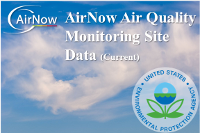

In [5]:
#Access EPA AirNow feature layer
airnow_id = "2d718d2733a74d1689d72b922c0ac4f4"
airnow_item = gis.content.get(airnow_id)
airnow_layer = airnow_item.layers[0]
airnow_item

In [6]:
sdf = pd.DataFrame.spatial.from_layer(airnow_layer)
sdf.describe()

,Elevation,GMTOffset,Latitude,Longitude,OZONE,OZONEPM_AQI,OZONEPM_AQI_SORT,OZONE_AQI,OZONE_AQI_SORT,OZONE_Measured,PM10_AQI_SORT,PM10_Measured,PM25,PM25_AQI,PM25_AQI_SORT,PM25_Measured,PM_AQI,PM_AQI_SORT,ValidTime,ObjectId
count,5033.0,5033.0,5033.0,5033.0,1300.0,2081.0,5033.0,1363.0,5033.0,5033.0,5033.0,5033.0,1284.0,1377.0,5033.0,5033.0,1476.0,5033.0,5033,5033.0
mean,163.670276,-0.946354,37.259281,-15.839707,28.981538,38.198462,-570.14842,29.228173,-720.542817,0.392211,-911.843632,0.143056,8.791277,40.234568,-714.671369,0.385655,39.299458,-694.503676,2024-07-18 05:00:00.000000256,387008437.0
min,-7.9,-10.0,-34.5766,-161.767,-1.0,0.0,-999.0,1.0,-999.0,0.0,-999.0,0.0,-3.3,0.0,-999.0,0.0,0.0,-999.0,2024-07-18 05:00:00,387005921.0
25%,0.0,-7.0,34.3778,-105.100861,19.0,24.0,-999.0,19.0,-999.0,0.0,-999.0,0.0,4.5,26.0,-999.0,0.0,25.0,-999.0,2024-07-18 05:00:00,387007179.0
50%,0.0,-5.0,36.233333,-81.468956,27.0,36.0,-999.0,26.0,-999.0,0.0,-999.0,0.0,6.85,38.0,-999.0,0.0,37.0,-999.0,2024-07-18 05:00:00,387008437.0
75%,50.6,9.0,41.30743,134.640075,38.0,48.0,31.0,36.0,12.0,1.0,-999.0,0.0,9.7,52.0,15.0,1.0,52.0,19.0,2024-07-18 05:00:00,387009695.0
max,3050.0,9.0,70.1319,144.35996,111.0,295.0,295.0,195.0,195.0,1.0,101.0,1.0,256.0,295.0,295.0,1.0,295.0,295.0,2024-07-18 05:00:00,387010953.0
std,429.650568,7.32676,7.318979,112.17016,14.589786,22.05911,511.022023,15.720158,457.042116,0.488292,285.211018,0.350165,12.102686,23.487151,463.502831,0.486798,23.348932,472.910736,NaN,1453.046283


In [7]:
nan_indices = pd.isna(sdf['PM25'])

# Drop rows with NaN values from the entire DataFrame
sdf3 = sdf.loc[~nan_indices]
sdf3.describe()

,Elevation,GMTOffset,Latitude,Longitude,OZONE,OZONEPM_AQI,OZONEPM_AQI_SORT,OZONE_AQI,OZONE_AQI_SORT,OZONE_Measured,PM10_AQI_SORT,PM10_Measured,PM25,PM25_AQI,PM25_AQI_SORT,PM25_Measured,PM_AQI,PM_AQI_SORT,ValidTime,ObjectId
count,1284.0,1284.0,1284.0,1284.0,669.0,1273.0,1284.0,675.0,1284.0,1284.0,1284.0,1284.0,1284.0,1272.0,1284.0,1284.0,1273.0,1284.0,1284,1284.0
mean,163.183879,-5.779595,39.49958,-89.731717,28.630792,42.494108,33.571651,28.598519,-458.790498,0.551402,-748.169003,0.278037,8.791277,40.296384,30.583333,1.0,40.362137,31.457944,2024-07-18 05:00:00,387008477.36215
min,-7.9,-10.0,-25.90382,-158.088593,0.0,0.0,-999.0,1.0,-999.0,0.0,-999.0,0.0,-3.3,0.0,-999.0,1.0,0.0,-999.0,2024-07-18 05:00:00,387005921.0
25%,0.0,-8.0,35.781466,-117.85585,19.0,28.0,28.0,19.0,-999.0,0.0,-999.0,0.0,4.5,26.0,26.0,1.0,26.0,26.0,2024-07-18 05:00:00,387007242.5
50%,0.0,-6.0,40.507395,-93.2566,27.0,41.0,40.0,26.0,10.0,1.0,-999.0,0.0,6.85,38.0,38.0,1.0,38.0,38.0,2024-07-18 05:00:00,387008487.0
75%,116.8,-5.0,45.302858,-79.885107,35.0,52.0,52.0,35.0,26.0,1.0,-999.0,1.0,9.7,52.0,52.0,1.0,52.0,52.0,2024-07-18 05:00:00,387009831.75
max,2563.5,8.0,70.1319,123.424434,111.0,295.0,295.0,195.0,195.0,1.0,62.0,1.0,256.0,295.0,295.0,1.0,295.0,295.0,2024-07-18 05:00:00,387010953.0
std,380.229233,3.06261,9.307663,45.302034,14.344657,23.541216,98.841766,16.011967,513.451147,0.497545,439.216995,0.448206,12.102686,23.405051,102.71739,0.0,23.358837,98.607834,NaN,1476.710233


## Inerpolation (K-Nearest Neighbor - sklearn)

Adopted this code from the previous GSR. This me method provides the hightest accuracy based on his interpolation test (50~65%)

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [9]:
X = np.array([[point['x'], point['y']] for point in sdf3['SHAPE']])
print(X)

[[ -8268386.09039157   4954097.70122062]
 [-13704046.02663097   5704527.14123554]
 [-13732229.89531001   4778930.9407347 ]
 ...
 [-13655671.5853093    5709812.00908333]
 [-10186119.79753708   5109915.43221161]
 [ -8979370.20842982   3089052.1255838 ]]


In [10]:
y_day_sum_pm = sdf3['PM25']

In [11]:
X_train_day_sum_pm, X_test_day_sum_pm, y_train_day_sum_pm, y_test_day_sum_pm = train_test_split(X, y_day_sum_pm, train_size = 0.8, test_size=0.2)

In [12]:
# create 500*500 grid (around 411m*447m)
XX_sk_krig, YY_sk_krig = np.mgrid[448623:664904:500j, 4082420:4305459:500j]

In [13]:
positions_sk_krig = np.vstack([XX_sk_krig.ravel(), YY_sk_krig.ravel()]).T

In [14]:
knn = KNeighborsRegressor(n_neighbors = 5, weights = "distance")

In [15]:
cross_val_score(knn, X, y_day_sum_pm, cv=5)

array([0.38392295, 0.49364938, 0.54684348, 0.56969553, 0.25585949])

In [16]:
np.mean(cross_val_score(knn, X, y_day_sum_pm, cv=5))

0.449994164956739

In [17]:
knn = KNeighborsRegressor(n_neighbors = 5, weights = "distance").fit(X_train_day_sum_pm, y_train_day_sum_pm)
dic = {'real':y_test_day_sum_pm, 'predict':knn.predict(X_test_day_sum_pm)}
dic_frame=pd.DataFrame(dic)

In [18]:
dic_frame

,real,predict
3197,7.8,12.786401
429,6.9,9.235531
1742,8.8,8.595448
1525,3.8,3.842874
3437,11.1,9.741531
...,...,...
284,7.2,6.692174
4607,7.6,3.549690
2301,8.4,8.287921
3027,10.1,8.345179


UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

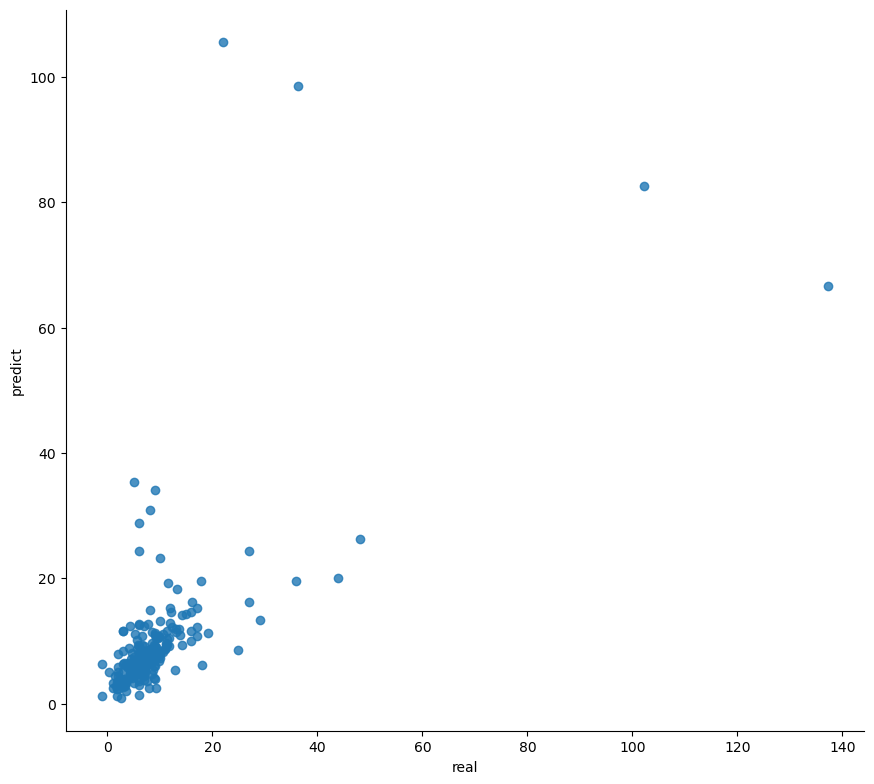

In [20]:
g = sns.lmplot(x="real", y="predict", data=dic_frame, height=8, aspect=1.1)
g.set(ylim=(0, 50),xlim=(0,50))

In [20]:
results=knn.predict(positions_sk_krig)
results2=results.reshape(XX_sk_krig.shape)

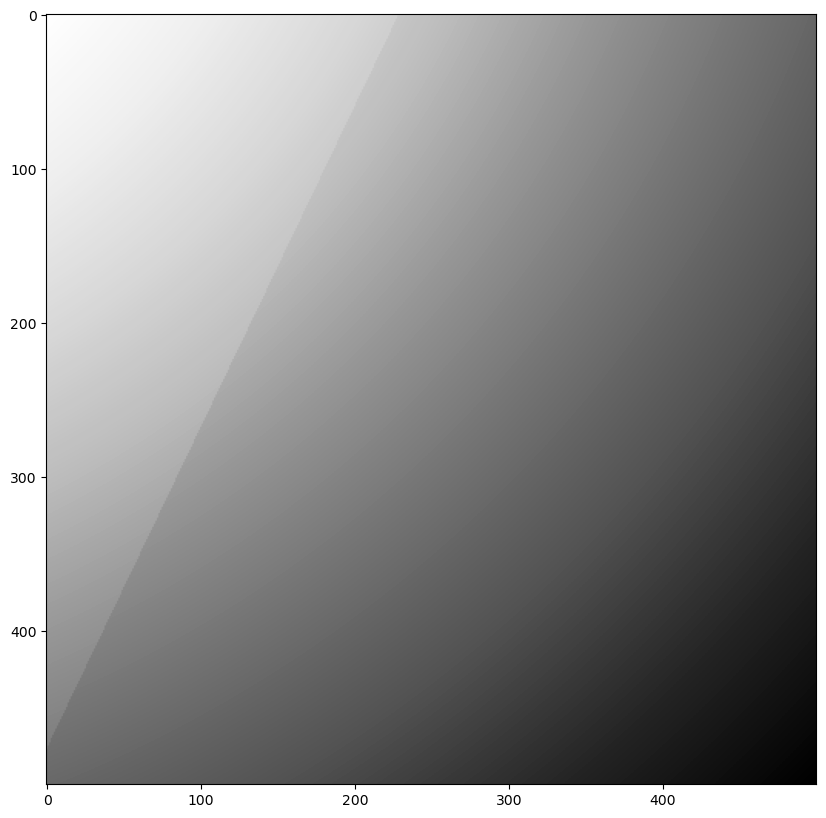

In [21]:
fig = plt.figure(figsize=(10,10))
plt.imshow(np.rot90(results2,1),cmap="Greys",vmin=results2.min(), vmax=results2.max())

In [22]:
interpolation=pd.DataFrame(positions_sk_krig).rename(columns={0:'x',1:'y'})
interpolation['pm']=pd.Series(results)
interpolation

,x,y,pm
0,448623.0,4.082420e+06,10.836079
1,448623.0,4.082867e+06,10.833529
2,448623.0,4.083314e+06,10.830977
3,448623.0,4.083761e+06,10.828424
4,448623.0,4.084208e+06,10.825870
...,...,...,...
249995,664904.0,4.303671e+06,10.857207
249996,664904.0,4.304118e+06,10.856264
249997,664904.0,4.304565e+06,10.855323
249998,664904.0,4.305012e+06,10.854385


In [23]:
interpolation = gpd.GeoDataFrame(
interpolation, geometry = gpd.points_from_xy(interpolation['x'], interpolation['y']), crs="EPSG:26910"
)

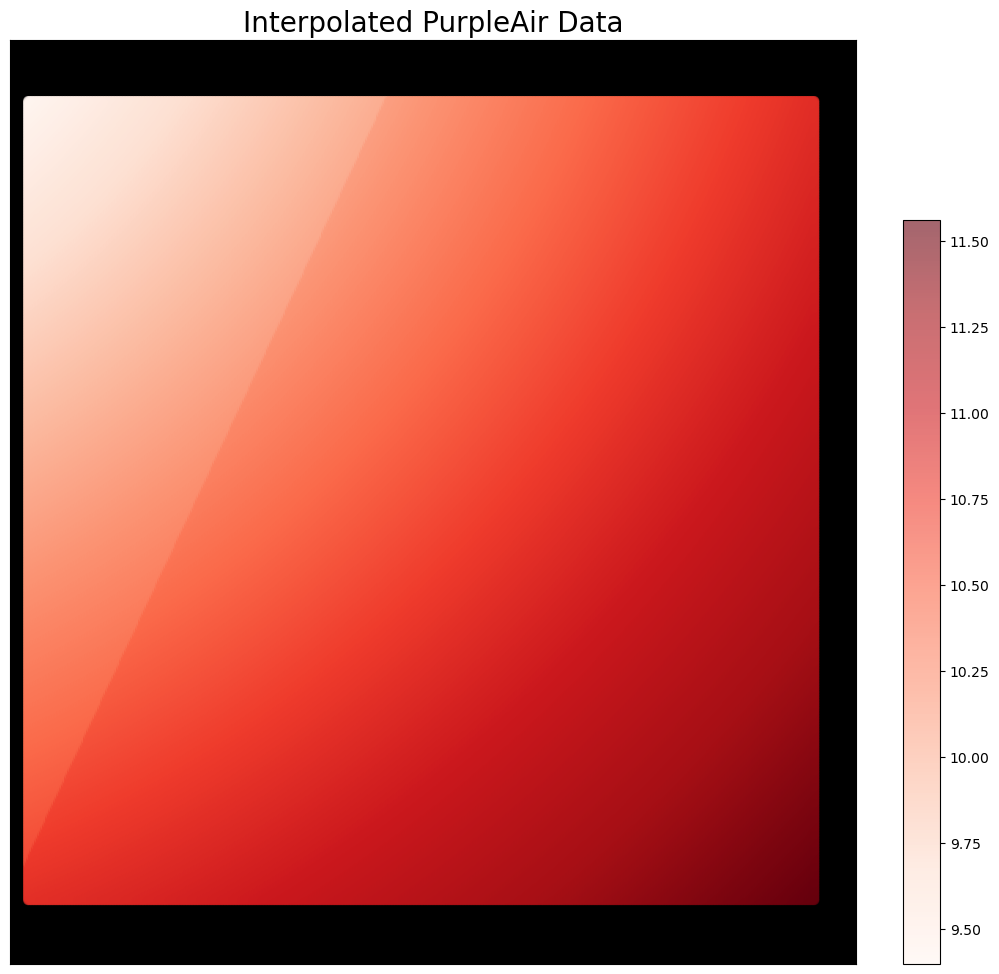

In [24]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
xlim = ([443683,676403])
ylim = ([4064653,4322426])

#PM 2.5 Hourly Average of Sep 2021
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Interpolated PurpleAir Data',fontsize=20)
sensor_plot=ax.scatter(interpolation.geometry.x, interpolation.geometry.y, marker=None,c=interpolation['pm'], cmap='Reds', alpha=0.6)

ax.axis('on')
ax.tick_params(left = False, right = False , labelleft = False ,
labelbottom = False, bottom = False)
ax.set_facecolor("black")
plt.colorbar(sensor_plot,orientation="vertical",fraction=0.04,anchor=(1.0,0.0),ax=ax)

fig = ax.figure
cb_ax = fig.axes[0]
cb_ax.tick_params(labelsize=20)

In [25]:
pip install rioxarray

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
DEPRECATION: Loading egg at /opt/conda/lib/python3.11/site-packages/tflite_model_maker-0.3.4-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 87.8 kB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [26]:
import rioxarray
import xarray as xr

In [27]:
x = interpolation['x'].values
y = interpolation['y'].values
pm = interpolation['pm'].values

# Create a 2D array from your data
xi, yi = np.unique(x), np.unique(y)
xi, yi = np.meshgrid(xi, yi)
pm_grid = np.full(xi.shape, np.nan)

for idx in range(len(x)):
    xi_idx = np.where(xi[0] == x[idx])[0][0]
    yi_idx = np.where(yi[:, 0] == y[idx])[0][0]
    pm_grid[yi_idx, xi_idx] = pm[idx]

# Convert to xarray DataArray
da = xr.DataArray(pm_grid, coords=[yi[:, 0], xi[0, :]], dims=['y', 'x'])
da.rio.write_crs("EPSG:26910", inplace=True)

# Save as GeoTIFF
da.rio.to_raster("interpolated_pm25.tif")

## Publishing and Updating Imagery Layer

In order to create updateable hosted imager layer, it has to be dynamic imagery layers with the image collection layer configuration.

1. Upload the GeoTIFF as an image item
2. Use that image toi create a hosted imagery layer
3. create a webmap using the imagery layer so that we can add that to the dashboard

More information can be found here: https://www.esri.com/arcgis-blog/products/arcgis-image-for-arcgis-online/imagery/updating-your-hosted-imagery-layer-with-arcgis-image-for-arcgis-online/#:~:text=Can%20users%20update%20all%20imagery%20layers%20hosted%20through%20ArcGIS%20Online,to%20delete%20and%20replace%20them.

In [28]:
from arcgis.raster.utils import publish_hosted_imagery_layer
from arcgis.raster.analytics import add_image
from arcgis.raster.analytics import delete_image

In [29]:
search_result = gis.content.search('title:Interpolated AirNow PM25 test', item_type = 'image', outside_org=False)
image_path = "interpolated_pm25.tif"

In [30]:
if len(search_result) == 0:
    # If no item is found, add a new item
    new_image = gis.content.add({
        "title": "Interpolated AirNow PM25 test",
        "tags": "PM2.5, Air Quality, Interpolation",
        "type": "Image"
    }, data = image_path)
    print(f"Added item with ID: {new_image.id}")
else:
    # If item exists, update it
    image_item = search_result[0]
    image_item.update(data = image_path)
    print(f"Updated existing item with ID: {image_item.id}")

Updated existing item with ID: aa6009251fc54ac6acb7402df41034a8


In [31]:
search_result2 = gis.content.search('Interpolated AirNow Image Collection', item_type = 'imagery layer', outside_org=False)

In [32]:
if len(search_result2) == 0:
    # Publish the hosted imagery layer
    newImageryLayer = publish_hosted_imagery_layer(
        input_data = image_path,
        layer_configuration = "IMAGE_COLLECTION",
        output_name = "Interpolated AirNow Image Collection",
        context = {"outSR": {"wkid": 26910}},
        gis = gis
    )
    print(f"Added imagery layer with ID: {newImageryLayer.id}")
else:
    # If item exists, update the data source with the latest interpolated raster
    imagery_layer = search_result2[0]
    imagerylayer_delete = delete_image(image_collection = imagery_layer, where = "OBJECTID <> 0")
    AddingImage = add_image(image_collection = imagery_layer,
                            input_rasters = image_path)
    print(f"Updated existing imagery layer with ID: {imagery_layer.id}")

Updated existing imagery layer with ID: ea3ad7a0fa2249d4a0ff6f340a63dd65


<Item title:"Interpolated AirNow Image Collection" type:Imagery Layer owner:1854851_CAL>
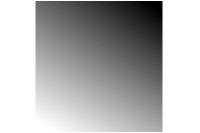

In [33]:
    imagery_layer = search_result2[0]
    imagery_layer